In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import all the required packages**

In [3]:
!pip install scikeras
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time
from sklearn.utils import shuffle
import seaborn as sn
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, cross_val_score
from keras.optimizers import Optimizer
from keras.callbacks import EarlyStopping
import numpy


**Read the input data and take a look on the features and their values**

In [4]:
in_data = pd.read_csv('/content/drive/MyDrive/COS 711/Almond.csv') # get dataset from this folder
in_data.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


**Drop highly correlated columns and replace missing values with 0**

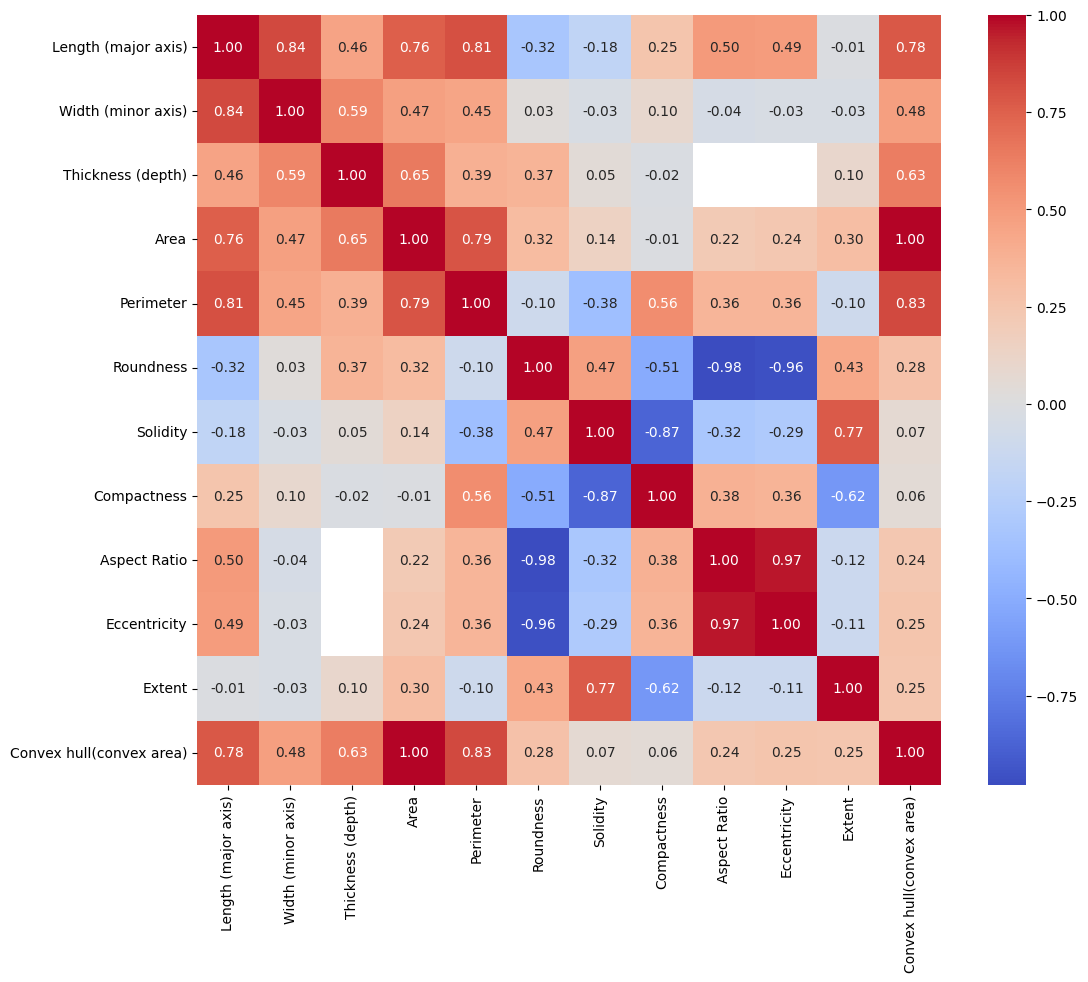

In [5]:

plt.figure(figsize=(12, 10))
numeric_df = in_data.select_dtypes(include=['float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

in_data = in_data.drop(columns = ['Aspect Ratio', 'Eccentricity', 'Convex hull(convex area)'])
in_data = in_data.fillna(0)


**For prediction model, we need to prepare the data in a feedable format. Shuffling of data has been performed to provide variability in train and test data.**

In [6]:
in_data = shuffle(in_data)
X = in_data.drop(['Type'], axis = 1)
X = np.array(X)
Y = np.array(in_data['Type'])
X[:10], Y[:10]


(array([[8.22000000e+02, 0.00000000e+00, 1.83889099e+02, 1.20806763e+02,
         1.74150000e+04, 5.19528999e+02, 0.00000000e+00, 9.87496810e-01,
         1.23334973e+00, 7.23635004e-01],
        [1.91300000e+03, 1.99992538e+02, 0.00000000e+00, 1.04366783e+02,
         1.62065000e+04, 6.13972650e+02, 5.15907411e-01, 9.37279510e-01,
         1.85096818e+00, 7.11404240e-01],
        [8.52000000e+02, 3.06916138e+02, 1.90496216e+02, 0.00000000e+00,
         4.57565000e+04, 1.08576153e+03, 6.18476877e-01, 9.69982511e-01,
         2.05024727e+00, 7.65735085e-01],
        [1.74900000e+03, 2.20190903e+02, 0.00000000e+00, 1.08439835e+02,
         1.86700000e+04, 5.80617312e+02, 4.90293000e-01, 9.78947644e-01,
         1.43689747e+00, 7.44239815e-01],
        [2.45800000e+03, 2.47649185e+02, 0.00000000e+00, 1.05029526e+02,
         2.00315000e+04, 6.94457931e+02, 4.15862522e-01, 9.57345632e-01,
         1.91588108e+00, 7.21284027e-01],
        [2.21400000e+03, 2.92281799e+02, 1.55382797e+02, 0.0

**Since we are performing multiclass classification, we need to encode the target labels and transform them in a categorical form.**

In [7]:
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)
Y

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

**Split the data into train and test set** \
**Standardize data**

In [49]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 0)
train_x.shape, train_y.shape, test_x.shape, test_y.shape
#Standardize the features (important for neural networks)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

**Neural Net Model**

In [59]:
in_dim = len(in_data.columns)-1

def create_model(optimizer='adam', activation='relu', dropout=0.1):
  model = Sequential()
  model.add(Input(shape=(in_dim,)))
  model.add(Dense(64, activation = activation))
  model.add(Dropout(rate=dropout))
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

model = create_model()

history = model.fit(train_x, train_y, epochs = 100, batch_size = 100, validation_split=0.30)

print('Testing')
scores = model.evaluate(test_x, test_y)
for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))




Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4806 - loss: 1.0038 - val_accuracy: 0.6112 - val_loss: 0.9097
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6083 - loss: 0.9238 - val_accuracy: 0.6774 - val_loss: 0.8652
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6711 - loss: 0.8577 - val_accuracy: 0.6910 - val_loss: 0.8296
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6764 - loss: 0.8414 - val_accuracy: 0.7080 - val_loss: 0.7986
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6889 - loss: 0.7943 - val_accuracy: 0.7233 - val_loss: 0.7717
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - loss: 0.7798 - val_accuracy: 0.7317 - val_loss: 0.7483
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7084 - loss: 0.7729 - val_accuracy: 0.7487 - val_loss: 0.7281
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7202 - loss: 0.7403 - val_accuracy: 0.7623 - 

**Testing of the model on the test data**

In [60]:
from sklearn.metrics import classification_report

test_size = 10
pred = model.predict(test_x[:test_size])
pred_ = np.argmax(to_categorical(pred), axis = 1)
print(pred.shape)
print(pred_.shape)

pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(test_y[:test_size]), axis = 1)[:,1])

# Calculate and print F1-score
# f1 = f1_score(pred_, true_y)
# print("F1-Score:", f1)
print(classification_report(true_y, pred_))


for i,j in zip(pred_, true_y):
    print("Predicted: {}, True: {}".format(i, j))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(10, 3)
(10, 1)
              precision    recall  f1-score   support

       MAMRA       0.60      1.00      0.75         6
     REGULAR       0.00      0.00      0.00         1
      SANORA       0.00      0.00      0.00         3

    accuracy                           0.60        10
   macro avg       0.20      0.33      0.25        10
weighted avg       0.36      0.60      0.45        10

Predicted: MAMRA, True: MAMRA
Predicted: MAMRA, True: SANORA
Predicted: MAMRA, True: MAMRA
Predicted: MAMRA, True: MAMRA
Predicted: MAMRA, True: SANORA
Predicted: MAMRA, True: MAMRA
Predicted: MAMRA, True: MAMRA
Predicted: MAMRA, True: SANORA
Predicted: MAMRA, True: REGULAR
Predicted: MAMRA, True: MAMRA


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarn

[0.511289119720459, 0.6314639449119568, 0.65477055311203, 0.679533839225769, 0.6839038729667664, 0.7086671590805054, 0.7152221202850342, 0.7137655019760132, 0.7232338190078735, 0.720320463180542, 0.7261471152305603, 0.7399854063987732, 0.7385287880897522, 0.7523670792579651, 0.7552804350852966, 0.7501820921897888, 0.7596504092216492, 0.7727603912353516, 0.7844136953353882, 0.7720320224761963, 0.7836853861808777, 0.7705754041671753, 0.794610321521759, 0.7967953681945801, 0.793153703212738, 0.7938820123672485, 0.8004369735717773, 0.7997086644172668, 0.8040786385536194, 0.8077203035354614, 0.8128186464309692, 0.8120903372764587, 0.819373607635498, 0.8237436413764954, 0.8230152726173401, 0.8201019763946533, 0.8208302855491638, 0.8368536233901978, 0.8375819325447083, 0.8295702934265137, 0.8281136155128479, 0.8339402675628662, 0.835396945476532, 0.8528769016265869, 0.8485069274902344, 0.8441369533538818, 0.8536052703857422, 0.8528769016265869, 0.8557902574539185, 0.8528769016265869, 0.850691

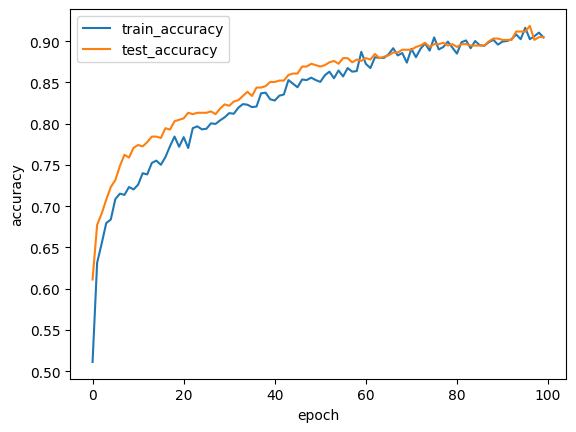

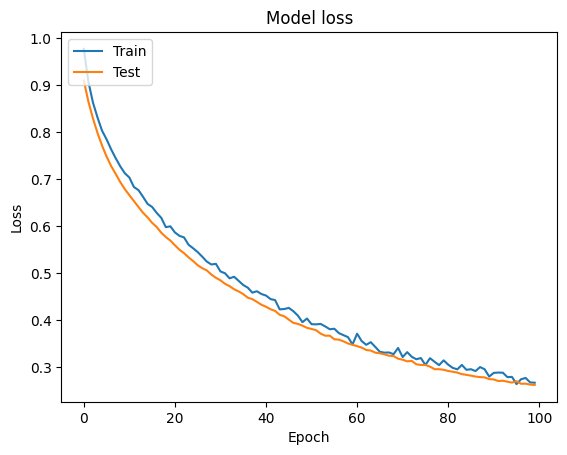

In [61]:
plt.plot(history.history['accuracy'])
print(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


  **RProp**


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert the data to PyTorch tensors
train_x_tensor = torch.tensor(train_x, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)  # Ensure y is the right shape
test_x_tensor = torch.tensor(test_x, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y, dtype=torch.float32)

# Step 4: Define the Sequential model
model = nn.Sequential(
    nn.Linear(train_x.shape[1], 64), #input
    nn.ReLU(), # hidden
    nn.Linear(64, 3),
    nn.Dropout(0.1)
)

# Step 5: Define the loss function and the Rprop optimizer
criterion = nn.CrossEntropyLoss()  # Binary Cross-Entropy loss
optimizer = optim.Rprop(model.parameters(), lr=0.01)
loss_total = []
# Step 6: Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(train_x_tensor)

    # Compute loss
    loss = criterion(outputs, train_y_tensor)
    loss_total.append(loss.item())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 7: Evaluate the model on the test set
with torch.no_grad():  # No need to track gradients during evaluation
    test_outputs = model(test_x_tensor)
    test_loss = criterion(test_outputs, test_y_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')
print(loss_total)

Epoch [10/100], Loss: 0.6648
Epoch [20/100], Loss: 0.3602
Epoch [30/100], Loss: 0.2746
Epoch [40/100], Loss: 0.2062
Epoch [50/100], Loss: 0.1545
Epoch [60/100], Loss: 0.1140
Epoch [70/100], Loss: 0.0968
Epoch [80/100], Loss: 0.0920
Epoch [90/100], Loss: 0.0761
Epoch [100/100], Loss: 0.0729
Test Loss: 0.1045
[1.1141154766082764, 1.0514426231384277, 0.9971922039985657, 0.9466410279273987, 0.898878812789917, 0.8456562161445618, 0.7987626194953918, 0.7409284114837646, 0.7099433541297913, 0.6647786498069763, 0.6268318295478821, 0.5979614853858948, 0.5580365061759949, 0.5361023545265198, 0.49471768736839294, 0.47200071811676025, 0.436730295419693, 0.3999696969985962, 0.39108288288116455, 0.36017632484436035, 0.3572830557823181, 0.33903151750564575, 0.3317652940750122, 0.3221553564071655, 0.30629777908325195, 0.30122268199920654, 0.29124656319618225, 0.2978373169898987, 0.2810865044593811, 0.274556428194046, 0.27611905336380005, 0.2644428610801697, 0.2564874291419983, 0.2550443410873413, 0.24

**RMSProp**

In [63]:
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='rmsprop')

rmsprop_model = create_model(optimizer)

rmsprop_history = rmsprop_model.fit(train_x, train_y, epochs = 100, batch_size = 100, validation_split=0.33)
print('Testing')
scores = rmsprop_model.evaluate(test_x, test_y)
for i, m in enumerate(rmsprop_model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3448 - loss: 1.1294 - val_accuracy: 0.4522 - val_loss: 1.0104
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4747 - loss: 1.0039 - val_accuracy: 0.5370 - val_loss: 0.9465
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5346 - loss: 0.9486 - val_accuracy: 0.5910 - val_loss: 0.8957
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5911 - loss: 0.9028 - val_accuracy: 0.6713 - val_loss: 0.8532
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6511 - loss: 0.8571 - val_accuracy: 0.7145 - val_loss: 0.8203
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6683 - loss: 0.8368 - val_accuracy: 0.7099 - val_loss: 0.7948
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6764 - loss: 0.8097 - val_accuracy: 0.7253 - val_loss: 0.7693
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6962 - loss: 0.7755 - val_accuracy: 0.7392 - 

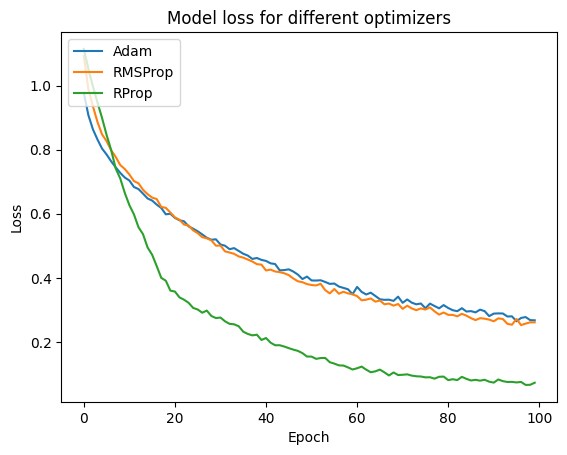

In [64]:
plt.plot(history.history['loss']) #adam
plt.plot(rmsprop_history.history['loss']) #rmsprop
plt.plot(loss_total) #rprop
plt.title('Model loss for different optimizers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Adam', 'RMSProp', 'RProp'], loc='upper left')
plt.show()

**Grid search**

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from scikeras.wrappers import KerasClassifier, KerasRegressor

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'model__dropout':[0.1,0.2]
}

model = KerasClassifier(build_fn=create_model, verbose=0)


grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_x, train_y)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.6233435270132518 using {'model__activation': 'tanh', 'model__dropout': 0.1, 'model__optimizer': 'adam'}


                        mean_test_score           std_test_score          
param_model__activation            relu      tanh           relu      tanh
param_model__optimizer                                                    
adam                           0.585627  0.608818       0.052431  0.063524
sgd                            0.445209  0.581295       0.030562  0.037600


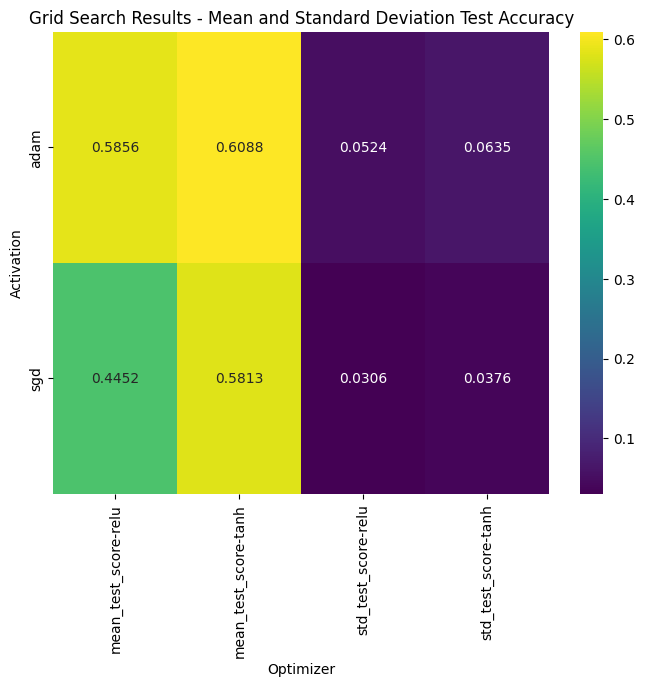

In [69]:
results = pd.DataFrame(grid_result.cv_results_)

pivot_table = results.pivot_table(values=['mean_test_score','std_test_score'],
                                  index='param_model__optimizer',
                                  columns='param_model__activation')

print(pivot_table)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".4f")
plt.title("Grid Search Results - Mean and Standard Deviation Test Accuracy")
plt.xlabel("Optimizer")
plt.ylabel("Activation")
plt.show()

**Hypothesis testing**

In [67]:
from scipy import stats
import numpy as np

#model 1

model = create_model(optimizer='adam', activation='relu', dropout=0.1)
history = model.fit(train_x, train_y, epochs = 100, batch_size = 100, validation_split=0.33)
model1_accuracies = history.history['accuracy']

model = KerasClassifier(build_fn=model, verbose=0)
k_folds = KFold(n_splits = 5)
scores1 = cross_val_score(model, train_x, train_y, cv = k_folds)

#model 2

model = create_model(optimizer='adam', activation='tanh', dropout=0.1)
history = model.fit(train_x, train_y, epochs = 100, batch_size = 100, validation_split=0.33)
model2_accuracies = history.history['accuracy']

model = KerasClassifier(build_fn=model, verbose=0)
k_folds = KFold(n_splits = 5)
scores2 = cross_val_score(model, train_x, train_y, cv = k_folds, scoring="accuracy")

print('\nModel 1: relu')

print("Cross Validation Scores: ", scores1)
print("Average CV Score: ", scores1.mean())
print("Standard Devation CV Score: ", scores1.std())
print("Number of CV Scores used in Average: ", len(scores1))

print('\nModel 2: tanh')

print("Cross Validation Scores: ", scores2)
print("Average CV Score: ", scores2.mean())
print("Standard Devation CV Score: ", scores2.std())
print("Number of CV Scores used in Average: ", len(scores2))

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(model1_accuracies, model2_accuracies)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Hypothesis testing interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, Model 1 performs significantly better.")
else:
    print("Fail to reject the null hypothesis, no significant difference between models.")

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4272 - loss: 1.1269 - val_accuracy: 0.4923 - val_loss: 1.0432
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5076 - loss: 1.0443 - val_accuracy: 0.5710 - val_loss: 0.9706
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5735 - loss: 0.9967 - val_accuracy: 0.6111 - val_loss: 0.9244
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6114 - loss: 0.9308 - val_accuracy: 0.6265 - val_loss: 0.8932
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6005 - loss: 0.9020 - val_accuracy: 0.6358 - val_loss: 0.8615
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6396 - loss: 0.8605 - val_accuracy: 0.6420 - val_loss: 0.8393
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6378 - loss: 0.8468 - val_accuracy: 0.6497 - val_loss: 0.8183
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6319 - loss: 0.8446 - val_accuracy: 0.6744 - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4353 - loss: 1.0666 - val_accuracy: 0.5910 - val_loss: 0.9580
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5953 - loss: 0.9483 - val_accuracy: 0.6389 - val_loss: 0.9000
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6300 - loss: 0.8919 - val_accuracy: 0.6698 - val_loss: 0.8566
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6498 - loss: 0.8724 - val_accuracy: 0.6806 - val_loss: 0.8208
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6828 - loss: 0.8240 - val_accuracy: 0.6883 - val_loss: 0.7995
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6710 - loss: 0.8272 - val_accuracy: 0.6991 - val_loss: 0.7827
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6818 - loss: 0.8015 - val_accuracy: 0.7238 - val_loss: 0.7601
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6772 - loss: 0.8063 - val_accuracy: 0.7222 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras


Model 1: relu
Cross Validation Scores:  [0.8956743  0.93638677 0.91071429 0.92857143 0.8877551 ]
Average CV Score:  0.911820377005764
Standard Devation CV Score:  0.01857504782542199
Number of CV Scores used in Average:  5

Model 2: tanh
Cross Validation Scores:  [0.79898219 0.84732824 0.82142857 0.84438776 0.83673469]
Average CV Score:  0.8297722905956275
Standard Devation CV Score:  0.01782103488013845
Number of CV Scores used in Average:  5
T-statistic: 10.658664367386788
P-value: 4.020507840184001e-18
Reject the null hypothesis, Model 1 performs significantly better.
